<a href="https://colab.research.google.com/github/vrund-patel-contact/Student-Academic-Success-Predictor/blob/main/Student_Academic_Success_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install the necessary libraries/modules/frameworks:

In [1]:
!pip install numpy --quiet
!pip install pandas --quiet
!pip install scikit-learn --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install plotly --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 2: Upload the dataset:

In [3]:
student_scores_dataset = files.upload()

Saving student_habits_performance.csv to student_habits_performance.csv


In [4]:
dataframe = pd.read_csv("student_habits_performance.csv")

# Step 3: View the dataset and remove any excess categories:

In [5]:
dataframe.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
df = dataframe.drop(["student_id" , "age" , "gender" , "social_media_hours" , "netflix_hours" , "part_time_job" , "attendance_percentage" , "sleep_hours" , "diet_quality" , "exercise_frequency" , "parental_education_level" , "internet_quality" , "mental_health_rating" , "extracurricular_participation"] , axis = 1)

In [7]:
df.head()

,study_hours_per_day,exam_score
0,0.0,56.2
1,6.9,100.0
2,1.4,34.3
3,1.0,26.8
4,5.0,66.4


# Step 4: Analyze the dataset's properties:

In [9]:
df.dtypes

,0
study_hours_per_day,float64
exam_score,float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   study_hours_per_day  1000 non-null   float64
 1   exam_score           1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [12]:
df.describe()

,study_hours_per_day,exam_score
count,1000.00000,1000.000000
mean,3.55010,69.601500
std,1.46889,16.888564
min,0.00000,18.400000
25%,2.60000,58.475000
50%,3.50000,70.500000
75%,4.50000,81.325000
max,8.30000,100.000000


In [13]:
df.corr()["exam_score"]

,exam_score
study_hours_per_day,0.825419
exam_score,1.000000


# Step 5: Visualize the data:

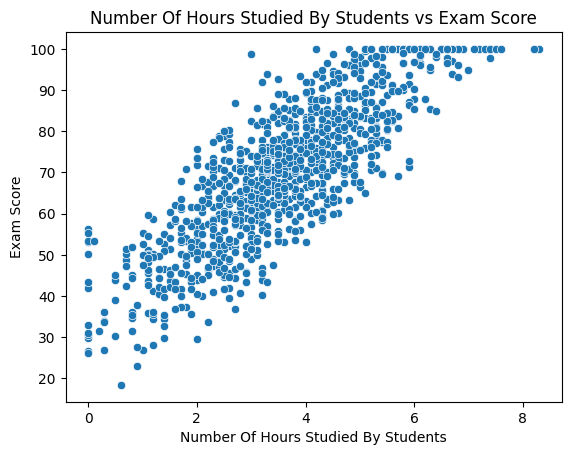

In [14]:
sns.scatterplot(x = "study_hours_per_day" , y = "exam_score" , data = df)
plt.title("Number Of Hours Studied By Students vs Exam Score" , fontsize = "12")
plt.xlabel("Number Of Hours Studied By Students")
plt.ylabel("Exam Score")
plt.show()

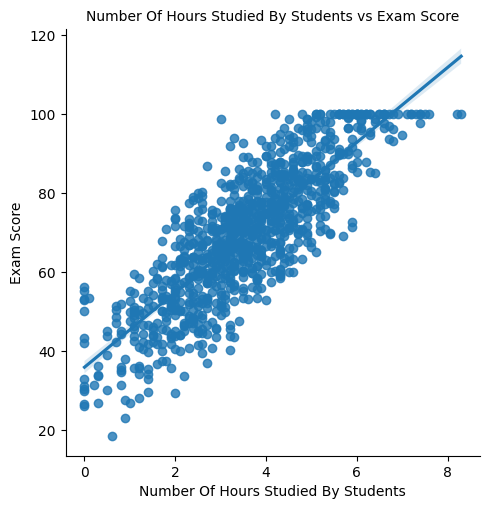

In [15]:
sns.lmplot(x = "study_hours_per_day" , y = "exam_score" , data = df)
plt.title("Number Of Hours Studied By Students vs Exam Score" , fontsize = "10")
plt.xlabel("Number Of Hours Studied By Students")
plt.ylabel("Exam Score")
plt.show()

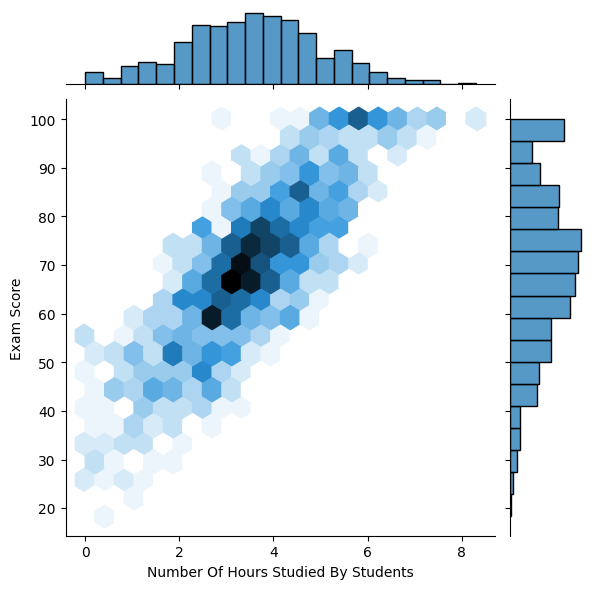

In [16]:
sns.jointplot(x = "study_hours_per_day" , y = "exam_score" , data = df , kind = "hex")
plt.xlabel("Number Of Hours Studied By Students")
plt.ylabel("Exam Score")
plt.show()

# Step 6: Assign the training/testing variables:

In [17]:
x = df[["study_hours_per_day"]]  # or you can utilize this: x = df.drop(["exam_score"], axis = 1)
y = df[["exam_score"]]           # or you can utilize this: y = df.drop(["study_hours_per_day"], axis = 1)

print(x.shape)
print(y.shape)

(1000, 1)
(1000, 1)


In [18]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2, random_state = 50)

print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

(800, 1) (800, 1)
(200, 1) (200, 1)


# Step 7: Train the Linear Regression Model:

In [19]:
from sklearn.linear_model import LinearRegression

Linear_Regression_model = LinearRegression()

Linear_Regression_model.fit(x_train, y_train)

LinearRegression()

In [20]:
y_test_predictive_values = Linear_Regression_model.predict(x_test)

# Step 8: Evaluate and compare the model's predictive values with the actual values:

In [21]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error

R_Two_Score = r2_score(y_test , y_test_predictive_values)
Mean_Absolute_Error = r2_score(y_test , y_test_predictive_values)
Mean_Squared_Error = r2_score(y_test , y_test_predictive_values)
Root_Mean_Squared_Error = np.sqrt(Mean_Squared_Error)

print (f"R-Squared Score: {R_Two_Score}")
print (f"Mean Absolute Error: {Mean_Absolute_Error}")
print (f"Mean Squared Error: {Mean_Squared_Error}")
print (f"Root Mean Squared Error: {Root_Mean_Squared_Error}")

R-Squared Score: 0.6547934540622029
Mean Absolute Error: 0.6547934540622029
Mean Squared Error: 0.6547934540622029
Root Mean Squared Error: 0.8091930882442107


In [22]:
print(y_test.shape)
print(y_test_predictive_values.shape)

(200, 1)
(200, 1)


# Step 9: Visualize the residual graph:

> This graph will evaluate and compare the model's predictive values with the residual values:



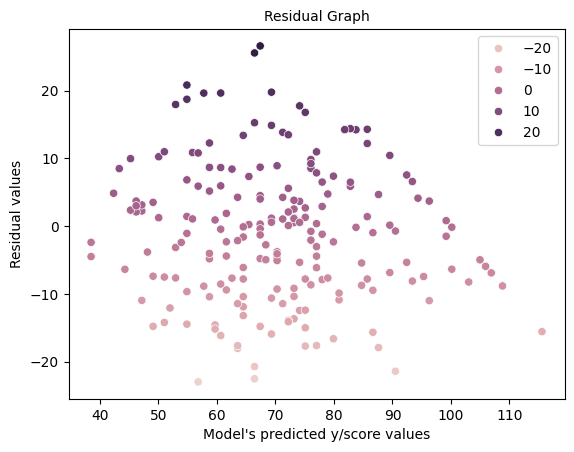

In [44]:
# If the value of Residual_value > 0:
# This implies that the values of y_test_2D_to_1D_nparray were greater than y_test_predictive_val_2D_to_1D_nparray. This means that the model underestimated the values for y_test_predictive_val_2D_to_1D_nparray.

# If the value of Residual_value < 0:
# This implies that the values of y_test_predictive_val_2D_to_1D_nparray were greater than y_test_2D_to_1D_nparray. This means that the model overestimated the values for y_test_predictive_val_2D_to_1D_nparray.

# If the value of Residual_value is very close to 0 or Residual_value = 0:
# This implies that y_test_predictive_val_2D_to_1D_nparray values and the actual y_test_2D_to_1D_nparray values are the same. If this were to happen, it would mean that the model's y_test_predictive_val_2D_to_1D_nparray values would be the same as the y_test_2D_to_1D_nparray values.
# Note: This is extremely unlikely for linear regression.

y_test_df_to_2D_nparray = y_test.to_numpy()
y_test_2D_to_1D_nparray = y_test_df_to_2D_nparray.ravel()

# We do not need to convert y_test_predictive_values into a numpy array since it's already been converted. This happened during step 7: "y_test_predictive_values = Linear_Regression_model.predict(x_test)".
y_test_predictive_val_2D_to_1D_nparray = y_test_predictive_values.ravel()

Residual_value = y_test_2D_to_1D_nparray - y_test_predictive_val_2D_to_1D_nparray

sns.scatterplot(x = y_test_predictive_val_2D_to_1D_nparray , y = Residual_value , hue = Residual_value)
plt.title("Residual Graph" , fontsize = "10")
plt.xlabel("Model's predicted y/score values")
plt.ylabel("Residual values")
plt.show()

# Step 10: Visualize the difference between the actual values and the predicted values:


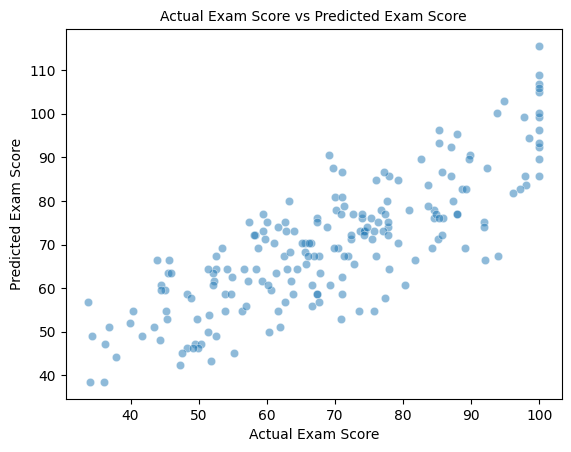

In [50]:
sns.scatterplot(x = y_test_2D_to_1D_nparray , y = y_test_predictive_val_2D_to_1D_nparray , alpha = 0.5)
plt.title("Actual Exam Score vs Predicted Exam Score" , fontsize = "10")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.show()

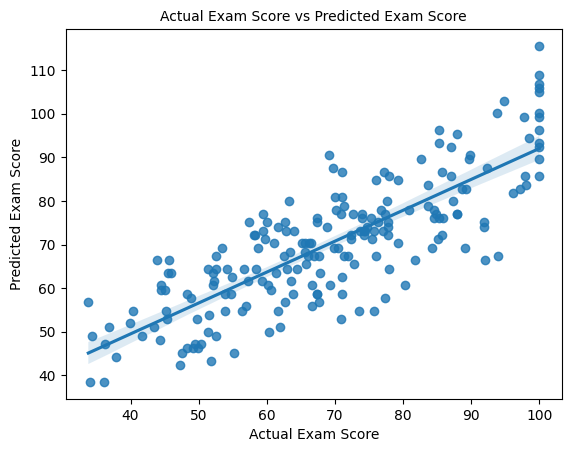

In [27]:
sns.regplot(x = y_test_2D_to_1D_nparray , y = y_test_predictive_val_2D_to_1D_nparray)
plt.title("Actual Exam Score vs Predicted Exam Score" , fontsize = "10")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.show()

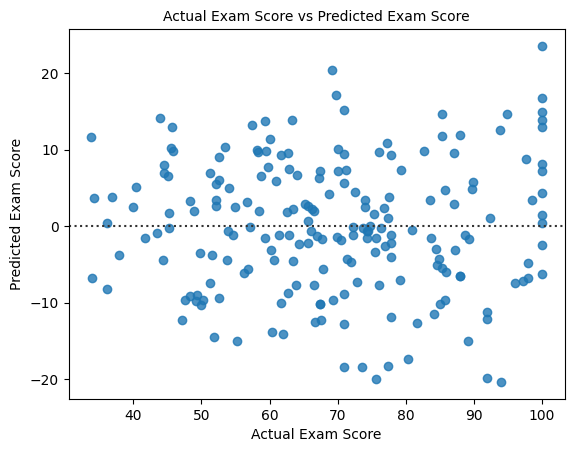

In [28]:
sns.residplot(x = y_test_2D_to_1D_nparray , y = y_test_predictive_val_2D_to_1D_nparray)
plt.title("Actual Exam Score vs Predicted Exam Score" , fontsize = "10")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.show()

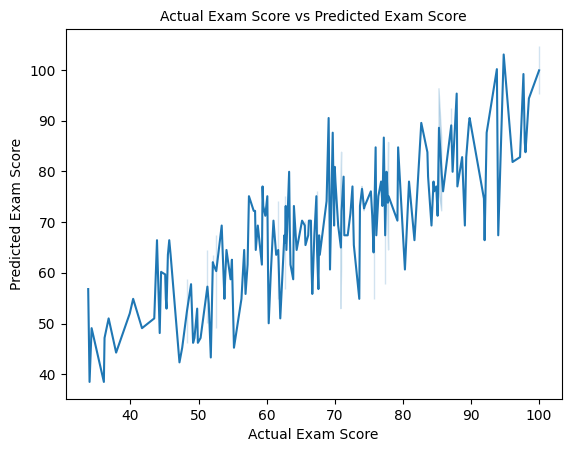

In [56]:
sns.lineplot(x = y_test_2D_to_1D_nparray , y = y_test_predictive_val_2D_to_1D_nparray)
plt.title("Actual Exam Score vs Predicted Exam Score" , fontsize = "10")
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.show()

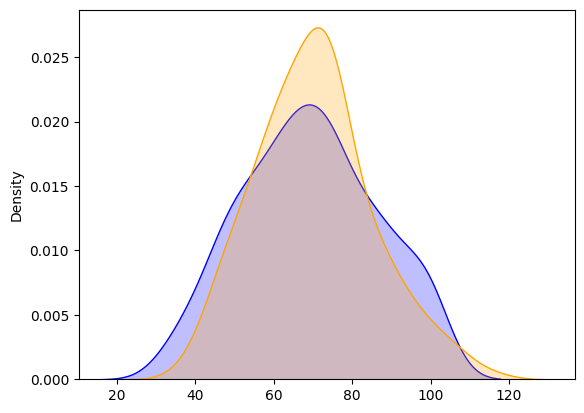

In [54]:

sns.kdeplot(y_test_2D_to_1D_nparray, label="Actual", fill=True, color="blue")
sns.kdeplot(y_test_predictive_val_2D_to_1D_nparray, label="Predicted", fill=True, color="orange")
plt.show()